In [26]:
pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [166]:
df = pd.read_csv('smriti_nagar.csv', parse_dates=True, index_col='date')

<ipython-input-166-38953909d27d>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('smriti_nagar.csv', parse_dates=True, index_col='date')


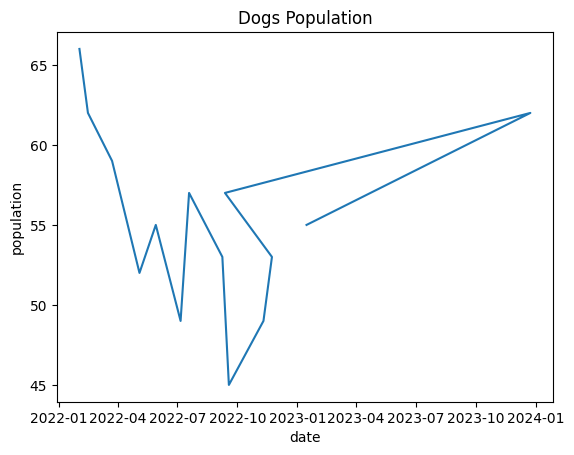

In [167]:
# Visualize the data
plt.plot(df)
plt.title('Dogs Population')
plt.xlabel('date')
plt.ylabel('population')
plt.show()

In [168]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [169]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['population'])

1. ADF :  -2.624177495676596
2. P-Value :  0.0881025139957578
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 13
5. Critical Values :
	 1% :  -4.068853732362312
	 5% :  -3.1271488757396453
	 10% :  -2.7017297633136095


In [170]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['population'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=91.704, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=90.128, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=90.878, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=154.221, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=92.082, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=92.105, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.976 seconds


In [171]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(14, 1)
(0, 1) (14, 1)


In [172]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['population'],order=(0,1,0))
model=model.fit()
model.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:1026: RuntimeWarning: invalid value encountered in long_scalars
  params_variance = np.inner(endog, endog) / self.nobs
/usr/local/lib/python3.9/dist-packages/statsmodels/base/m

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             population   No. Observations:                    0
Model:                 ARIMA(0, 1, 0)   Log Likelihood                   0.000
Date:                Sat, 15 Apr 2023   AIC                              2.000
Time:                        20:18:29   BIC                                nan
Sample:                             0   HQIC                               nan
                                  - 0                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2            nan          0        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='date'>

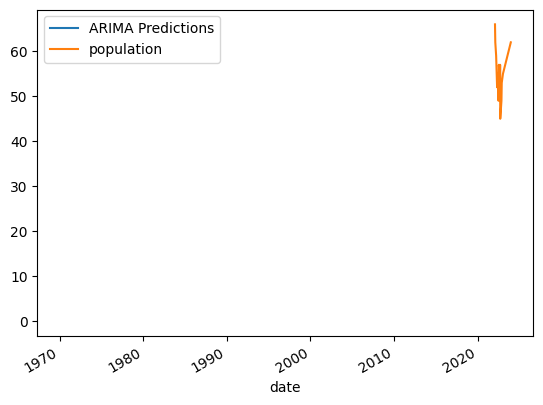

In [173]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['population'].plot(legend=True)


In [174]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['population'].mean()
rmse=sqrt(mean_squared_error(pred,test['population']))
print(rmse)

55.56334865975695
